# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cities[0:10]

In [4]:
rows = []
record_count = 0

for city in cities:
    print()
    print(city)
    record_count += 1
    print(record_count)
    row = {}
    
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)
       
        
        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]
    
                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)
                

                if (response2.status_code == 200):
                    data2 = response2.json()
                    
                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                    clouds = data2["clouds"]["all"]
                    country =data2['sys']["country"]
                   
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind
                row["cloudiness"] = clouds
                row["country"] = country
              

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
        print()
        
    # sleep
    time.sleep(3)


cap malheureux
1

arraial do cabo
2

puerto ayora
3

gola gokarannath
4

hermanus
5

los llanos de aridane
6

yellowknife
7

kologriv
8

punta arenas
9

naze
10

miles city
11

carnarvon
12

samalaeulu
13
no lat/long for samalaeulu

albany
14

jamestown
15

ilulissat
16

tasiilaq
17

provideniya
18

barrow
19

lagoa
20

iqaluit
21

nabire
22

ust-koksa
23

pop
24

grindavik
25

kihei
26

hobart
27

springbok
28

ancud
29

saint-philippe
30

avarua
31

padang
32

ylivieska
33

ponta do sol
34

mar del plata
35

zhigansk
36

rikitea
37

qaqortoq
38

port elizabeth
39

new norfolk
40

upernavik
41

laiagam
42

caravelas
43

esperance
44

busselton
45

changtu
46

katsuura
47

mahebourg
48

longyearbyen
49

venezuela
50

qaanaaq
51

new castle
52

praya
53

vaini
54

roald
55

svetlaya
56

khatanga
57

batagay
58

bethel
59

lithakia
60

hilo
61

nikolskoye
62

vicuna
63

atuona
64

camabatela
65

pevek
66

faanui
67

tiksi
68

illoqqortoormiut
69

kapaa
70

wenatchee
71

bengkulu
72

yan


tukums
513

tsuyama
514

aykhal
515

niquelandia
516

lebowakgomo
517

bokspits
518
'country'
Oh no! Everything failed and broke for bokspits. There should be an error above. Sux


cockburn town
519

umzimvubu
520

havre-saint-pierre
521

svetlogorsk
522

puerto escondido
523

quatre cocos
524

san vicente
525

shimoda
526

tabuk
527

nalut
528

rundu
529

kamenskoye
530

san gavino monreale
531

nicoya
532

poso
533

pottsville
534

conde
535

westport
536

tolaga bay
537

mogadishu
538

pinega
539

aflu
540

rocha
541

rock sound
542

tran
543

chepareria
544

pittsburg
545

mchinji
546

rawannawi
547

kiama
548

san julian
549

tiznit
550

gwanda
551

labutta
552

san cristobal
553

saint george
554

lubango
555

wamba
556

adre
557

turan
558

bria
559

sorland
560

tunduru
561

bagotville
562

bernay
563

bacuit
564

zhelyabovka
565
no lat/long for zhelyabovka

boyolangu
566

segou
567

tarko-sale
568

vanimo
569

ust-maya
570

steamboat springs
571

antofagasta
572

jiexiu
573



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(rows)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country
0,cap malheureux,-19.985995,57.619612,Clouds,72.45,81,1016,3.69,17,MU
1,arraial do cabo,-22.966284,-42.024427,Clouds,75.09,88,1015,11.50,75,BR
2,puerto ayora,-0.747167,-90.313420,Clouds,74.19,94,1012,3.00,28,EC
3,gola gokarannath,28.074659,80.472064,Clear,48.90,62,1020,3.65,0,IN
4,hermanus,-34.417500,19.236111,Clear,69.84,85,1012,15.82,4,ZA


In [6]:
df.to_csv(output_data_file, index_label = "city_id")

In [7]:
df = pd.read_csv(output_data_file)
df.head()

,city_id,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country
0,0,cap malheureux,-19.985995,57.619612,Clouds,72.45,81,1016,3.69,17,MU
1,1,arraial do cabo,-22.966284,-42.024427,Clouds,75.09,88,1015,11.50,75,BR
2,2,puerto ayora,-0.747167,-90.313420,Clouds,74.19,94,1012,3.00,28,EC
3,3,gola gokarannath,28.074659,80.472064,Clear,48.90,62,1020,3.65,0,IN
4,4,hermanus,-34.417500,19.236111,Clear,69.84,85,1012,15.82,4,ZA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
mask = df.humidity > 100
df.loc[mask]

,city_id,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

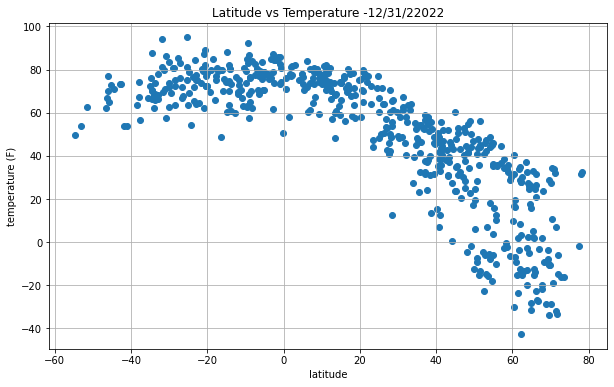

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.temperature)
plt.title("Latitude vs Temperature -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

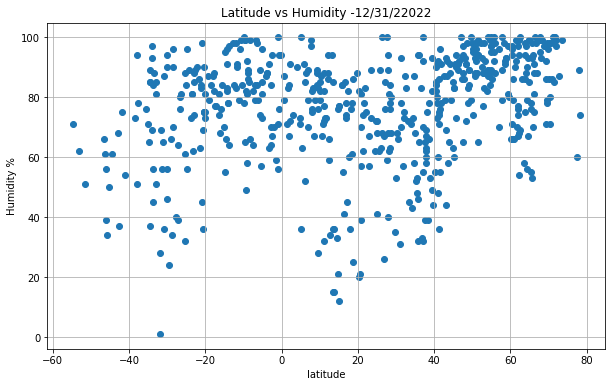

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.humidity)
plt.title("Latitude vs Humidity -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

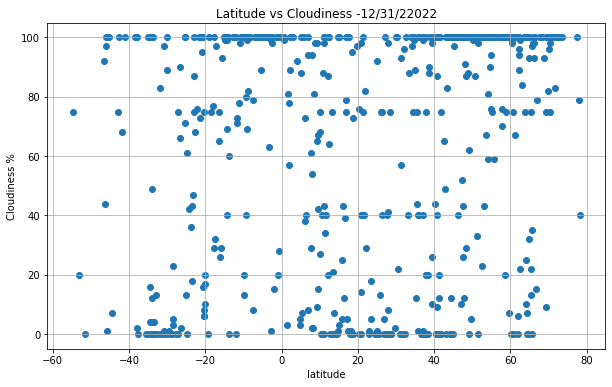

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.cloudiness)
plt.title("Latitude vs Cloudiness -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

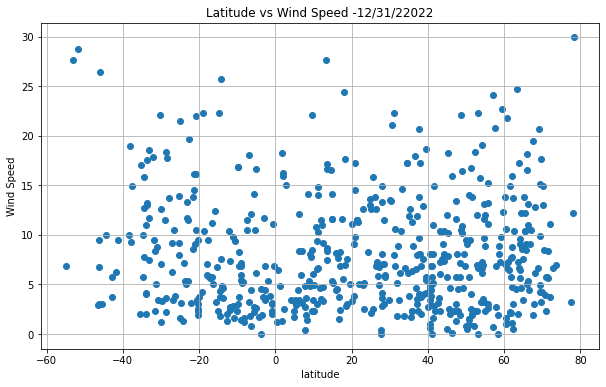

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.wind_speed)
plt.title("Latitude vs Wind Speed -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6916555991856715


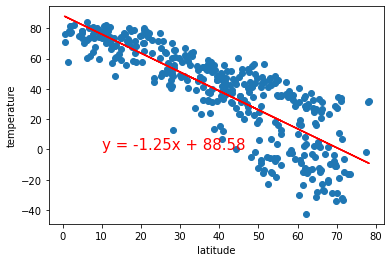

In [13]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)


x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.09656064475814935


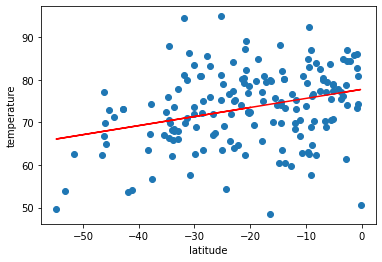

In [14]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14162450573547608


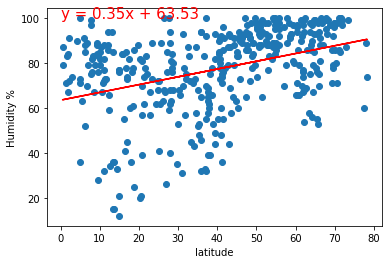

In [15]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16084443298916842


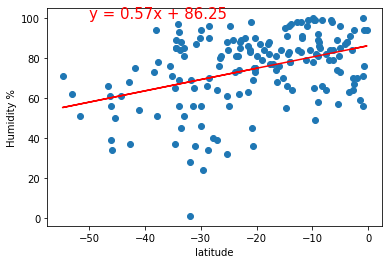

In [16]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09805106373801442


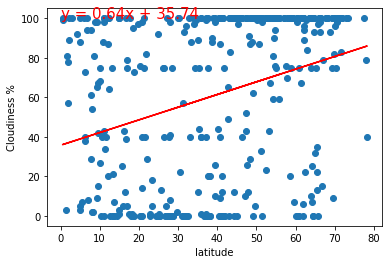

In [17]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09805106373801442


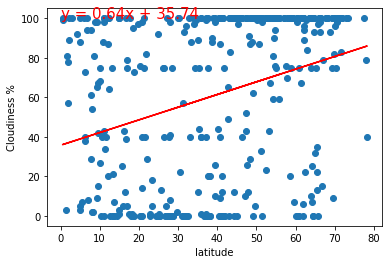

In [18]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09643503483385307


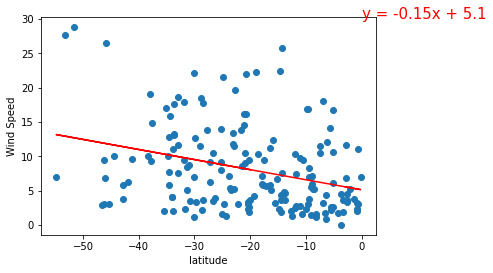

In [19]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
There is a small positive relationship between latitude and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003008262797815176


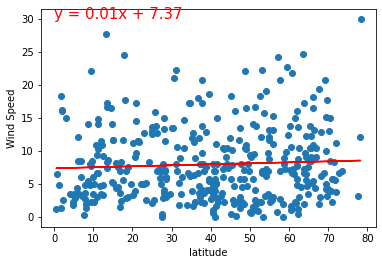

In [20]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
No relationship between latitude and wind speed